# **(EDA)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Air_Pollution_Team_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Air_Pollution_Team_2'

# Section 1

Section 1 content

Importing libraries and Converting CSV to a Dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Dataset/EDA/pollution_us_2012_2016-population-weather.csv') # Reading the CSV file
pd.set_option("display.max_columns", None)
df.head()


,Address,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Population,Latitude,Longitude,tmax,prcp,wspd
0,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-01,17.716667,31.0,0,29,0.013667,0.030,10,25,0.254167,0.5,19,0.0,0.336842,0.6,5,7.0,"542,649",31.9681,-111.7806,26.7,0.0,17.6
1,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-02,15.062500,30.6,18,28,0.015083,0.030,10,25,0.200000,0.6,19,0.0,0.225000,0.4,23,5.0,"542,649",31.9681,-111.7806,24.4,0.0,27.4
2,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-03,21.643478,31.0,18,29,0.011417,0.026,9,22,0.295455,0.7,8,0.0,0.295833,0.4,0,5.0,"542,649",31.9681,-111.7806,26.1,0.0,10.8
3,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-04,25.041668,37.8,10,35,0.009208,0.020,10,17,0.737500,2.1,19,3.0,0.345833,0.5,12,6.0,"542,649",31.9681,-111.7806,24.4,0.0,9.0
4,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-05,21.981817,37.1,17,35,0.013042,0.031,9,26,0.330435,0.8,21,0.0,0.291667,0.6,23,7.0,"542,649",31.9681,-111.7806,23.9,0.0,9.7


---

In [8]:
# Cell 9: Check for outliers (basic)
df[['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']] = df[['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']].apply(pd.to_numeric, errors='coerce')

In [11]:
# Cell: Detect and count outliers using IQR method

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Function to count outliers per column
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Apply to all numeric columns
outlier_counts = {col: count_outliers_iqr(df, col) for col in numeric_cols}

# Convert to DataFrame for easy viewing
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df.sort_values(by='Outlier Count', ascending=False)


,Outlier Count
prcp,10728
O3 1st Max Hour,8488
SO2 AQI,6033
SO2 1st Max Value,5331
SO2 Mean,4434
CO 1st Max Hour,3520
O3 AQI,3353
CO Mean,3346
CO 1st Max Value,2680
CO AQI,2023


## 📊 Bar Chart of Outlier Counts per Numeric Column

This visualization displays the number of outliers detected in each numeric column of a dataset. It's useful for identifying which variables may require cleaning, transformation, or further investigation.



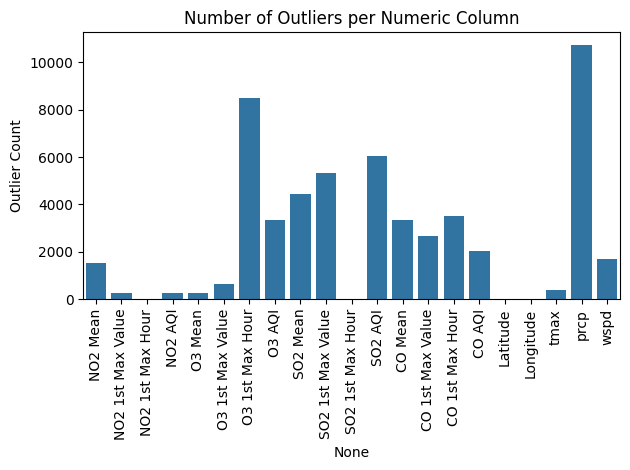

In [12]:
# Bar chart of outlier counts
sns.barplot(x=outlier_df.index, y='Outlier Count', data=outlier_df.reset_index())
plt.xticks(rotation=90)
plt.title('Number of Outliers per Numeric Column')
plt.tight_layout()
plt.show()


---

## Distribution of Numerical Variables

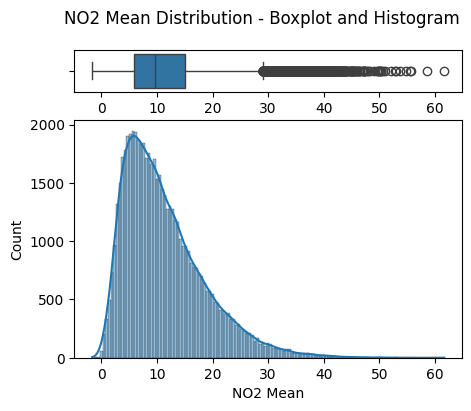

NO2 Mean | Non-outlier range: -8.04 to 29.03
NO2 Mean | skewness: 1.18 | kurtosis: 1.71




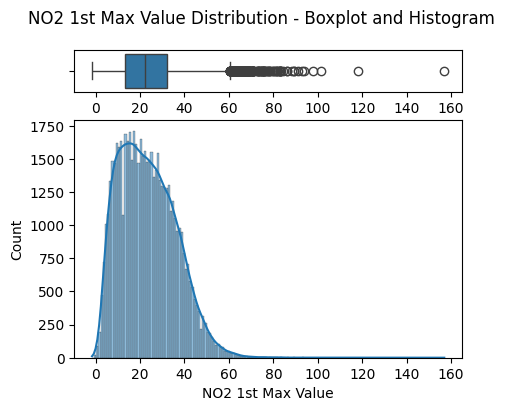

NO2 1st Max Value | Non-outlier range: -15.15 to 60.45
NO2 1st Max Value | skewness: 0.56 | kurtosis: 0.24




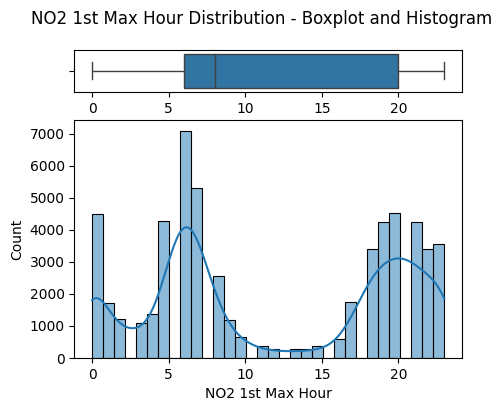

NO2 1st Max Hour | Non-outlier range: -15.0 to 41.0
NO2 1st Max Hour | skewness: 0.04 | kurtosis: -1.58




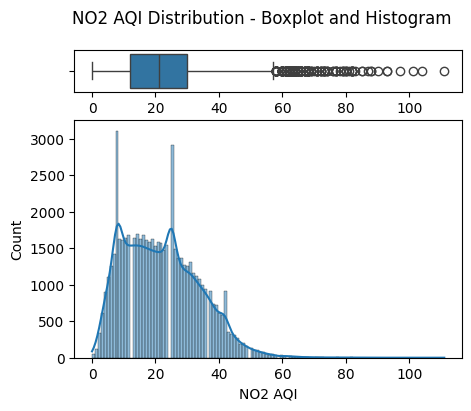

NO2 AQI | Non-outlier range: -15.0 to 57.0
NO2 AQI | skewness: 0.57 | kurtosis: 0.2




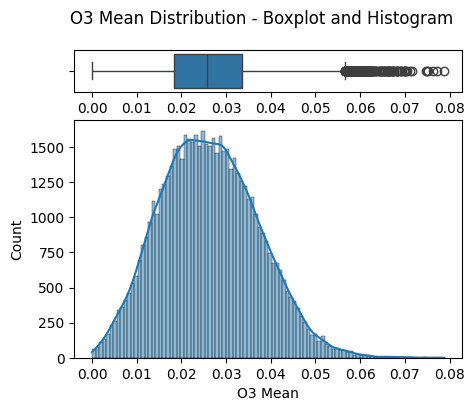

O3 Mean | Non-outlier range: -0.0 to 0.06
O3 Mean | skewness: 0.26 | kurtosis: -0.15




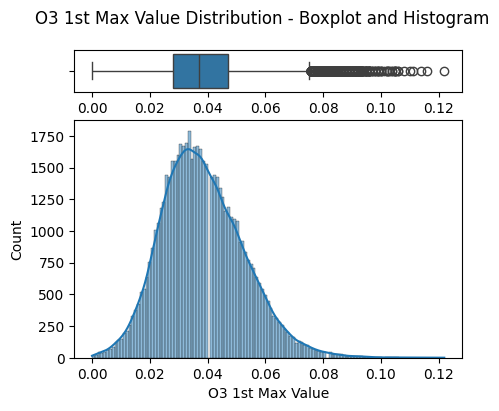

O3 1st Max Value | Non-outlier range: -0.0 to 0.08
O3 1st Max Value | skewness: 0.47 | kurtosis: 0.43




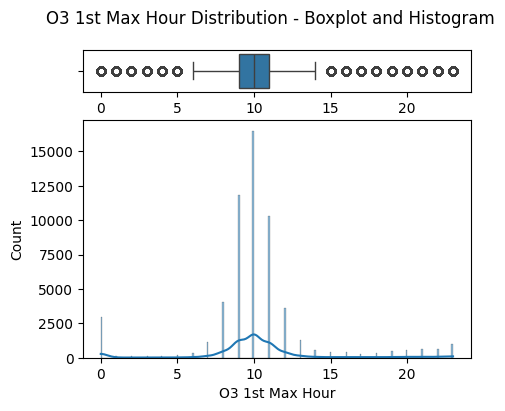

O3 1st Max Hour | Non-outlier range: 6.0 to 14.0
O3 1st Max Hour | skewness: 0.47 | kurtosis: 3.5




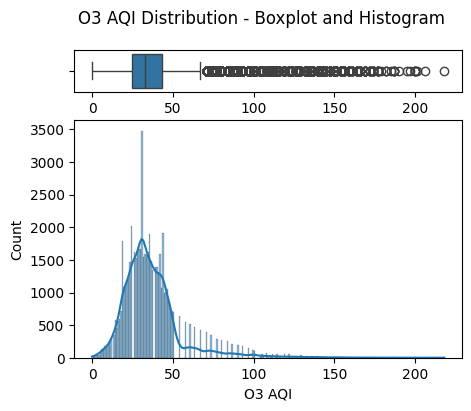

O3 AQI | Non-outlier range: -2.0 to 70.0
O3 AQI | skewness: 2.37 | kurtosis: 9.46




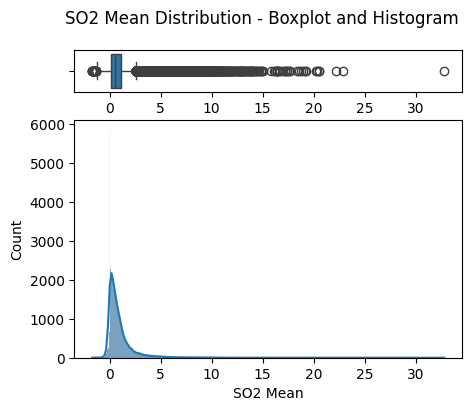

SO2 Mean | Non-outlier range: -1.25 to 2.56
SO2 Mean | skewness: 4.36 | kurtosis: 34.71




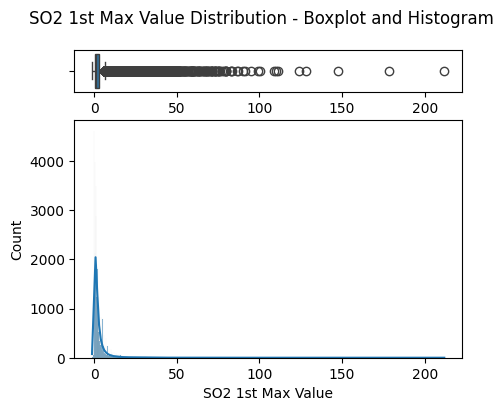

SO2 1st Max Value | Non-outlier range: -2.85 to 6.35
SO2 1st Max Value | skewness: 8.03 | kurtosis: 126.24




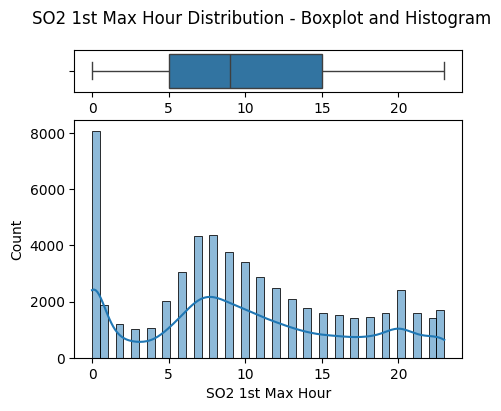

SO2 1st Max Hour | Non-outlier range: -10.0 to 30.0
SO2 1st Max Hour | skewness: 0.25 | kurtosis: -0.88




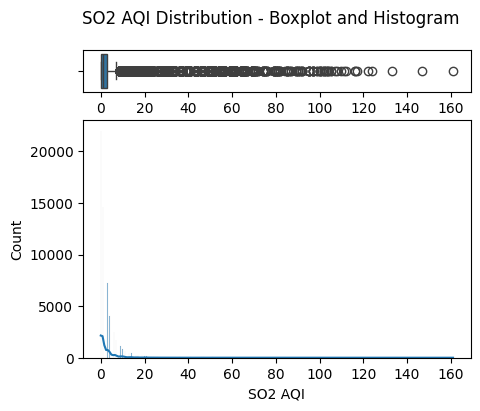

SO2 AQI | Non-outlier range: -4.5 to 7.5
SO2 AQI | skewness: 6.11 | kurtosis: 55.64




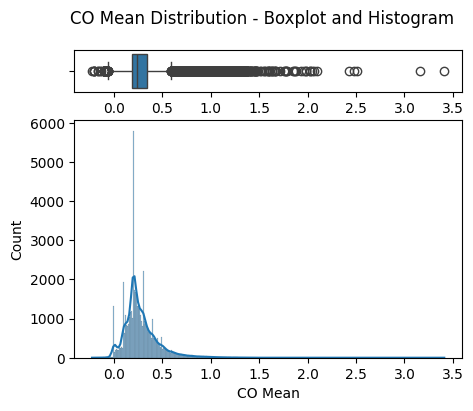

CO Mean | Non-outlier range: -0.06 to 0.59
CO Mean | skewness: 2.14 | kurtosis: 10.84




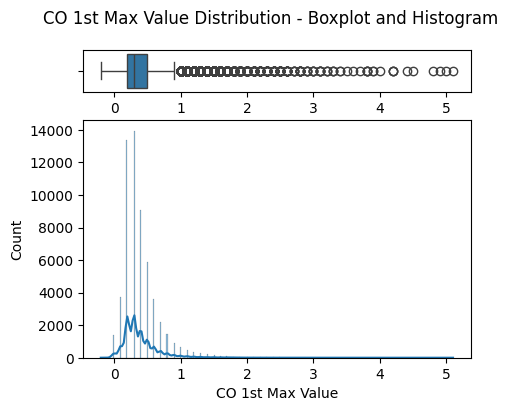

CO 1st Max Value | Non-outlier range: -0.25 to 0.95
CO 1st Max Value | skewness: 3.12 | kurtosis: 19.85




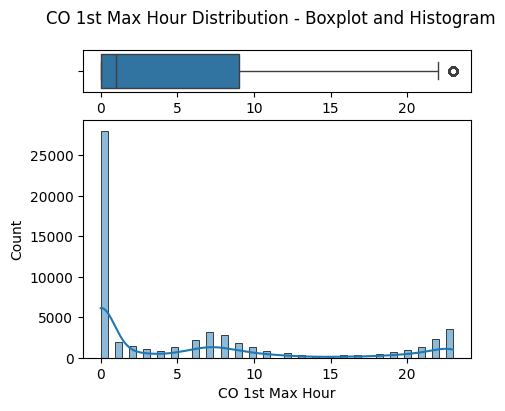

CO 1st Max Hour | Non-outlier range: -13.5 to 22.5
CO 1st Max Hour | skewness: 1.15 | kurtosis: -0.08




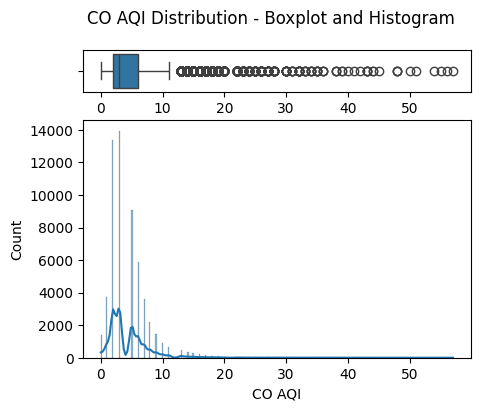

CO AQI | Non-outlier range: -4.0 to 12.0
CO AQI | skewness: 2.83 | kurtosis: 17.04




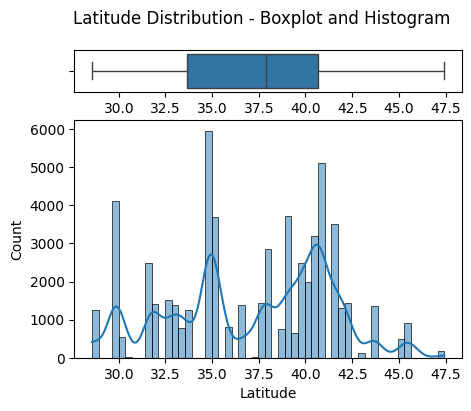

Latitude | Non-outlier range: 23.16 to 51.17
Latitude | skewness: -0.22 | kurtosis: -0.87




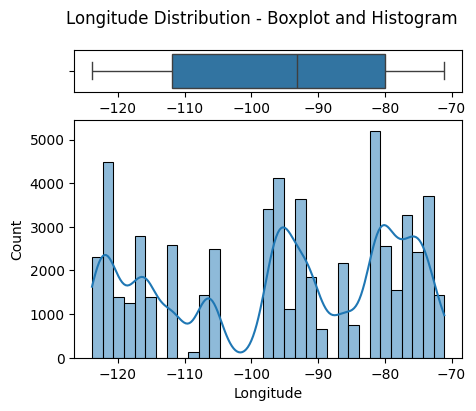

Longitude | Non-outlier range: -159.73 to -32.18
Longitude | skewness: -0.29 | kurtosis: -1.3




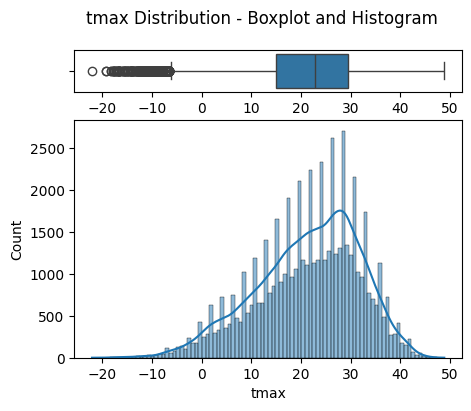

tmax | Non-outlier range: -6.6 to 51.0
tmax | skewness: -0.5 | kurtosis: -0.14




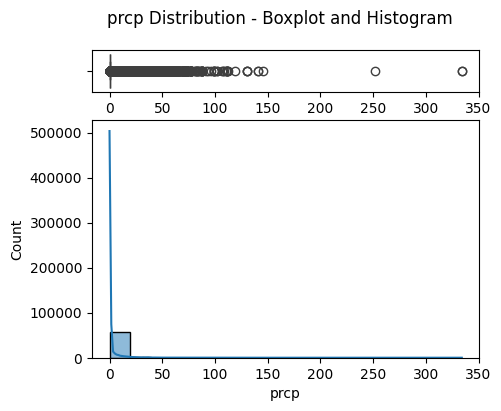

prcp | Non-outlier range: 0.0 to 0.0
prcp | skewness: 10.82 | kurtosis: 265.97




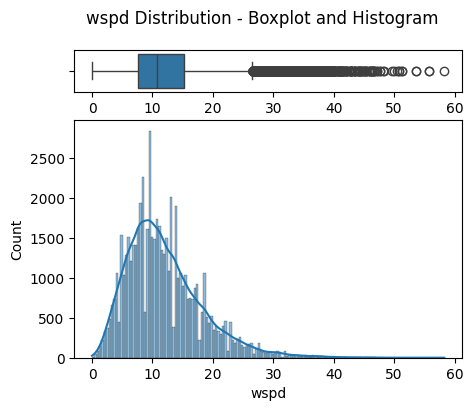

wspd | Non-outlier range: -3.8 to 26.6
wspd | skewness: 1.16 | kurtosis: 2.23




In [13]:
def plot_histogram_and_boxplot(df):
    for col in df.select_dtypes(include='number').columns:
        fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(5,4), 
                                 gridspec_kw={"height_ratios": (.15, .85)})
        
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[0])
        
        # Histogram
        sns.histplot(data=df, x=col, kde=True, ax=axes[1])
        
        # Title
        fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
        plt.show()

        # Outlier range
        IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
        print(
            f"{col} | Non-outlier range: "
            f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
            f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}"
        )

        # Skewness & Kurtosis just for this column
        print(f"{col} | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")
        print("\n")


plot_histogram_and_boxplot(df)

I can see that most of these variables show either some positive ("NO2 Mean", "NO2 1st Max Value", "NO2 AQI", "SO2 Mean", "SO2 1st Max Value", "CO Mean", "CO2 1st Max Value", "prcp" and "wspd") or negative () skew, and varying levels of kurtosis. Some variable are evenly distributed  

---

## 📦 Boxplots of Pollutant Distributions

This code generates individual boxplots for each selected pollutant column in the dataset. Boxplots are powerful tools for visualizing the distribution, central tendency, and spread of numeric data, while also highlighting potential outliers.


showing all the distributions by ('NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean)

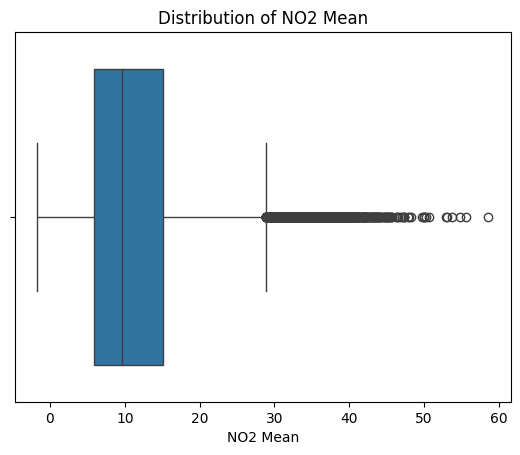

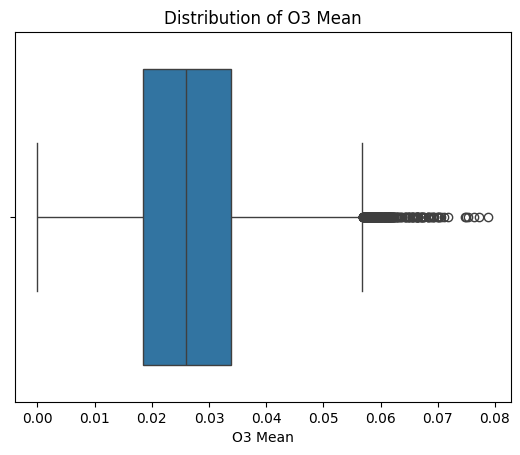

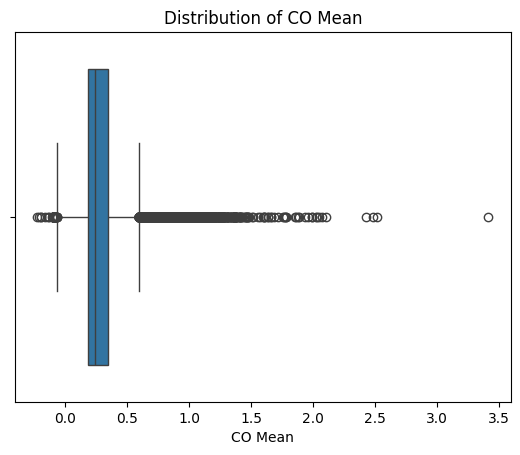

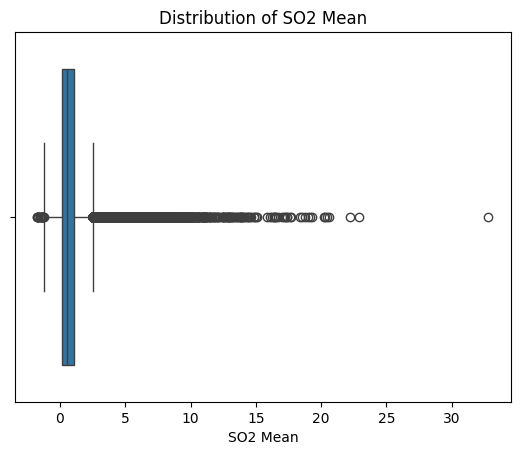

In [11]:
# Cell 10: Boxplots
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']
for col in pollutants:
    sns.boxplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


## 🧼 Data Cleaning and Date Transformation Steps

These preprocessing steps prepare the dataset for analysis by cleaning population data, converting date formats, and extracting year values for trend analysis.


In [12]:
# Cell 7: Clean 'Population' column
df['Population'] = df['Population'].str.replace(',', '').astype(int)

# Cell 8: Convert 'Date Local' to datetime
df['Date Local'] = pd.to_datetime(df['Date Local'])

# Cell 9: Extract year for trend analysis
df['Year'] = df['Date Local'].dt.year


## 📈 Yearly Average Trends of Pollutants (2011–2016)

This section calculates and visualizes the yearly average concentrations of selected air pollutants. It helps identify long-term trends and supports evidence-based environmental analysis.



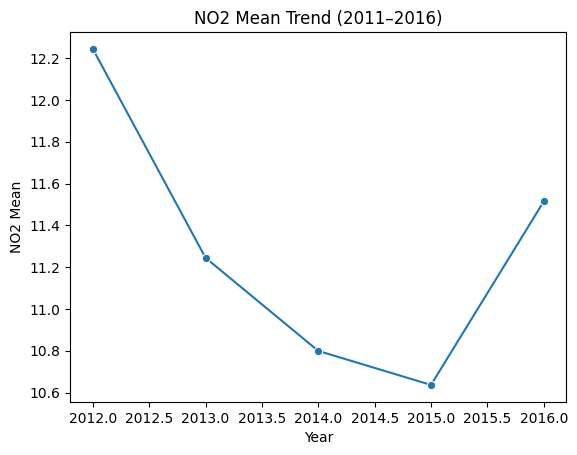

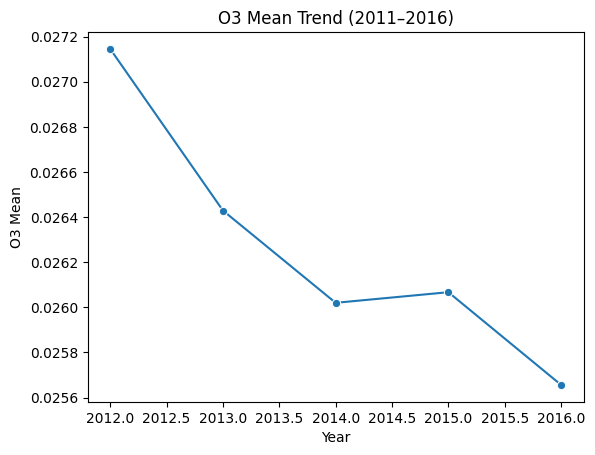

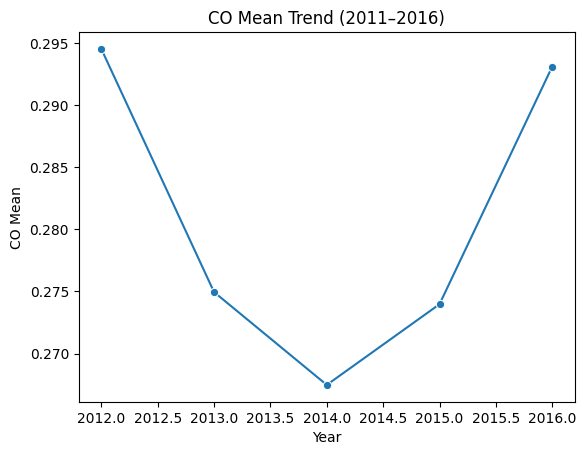

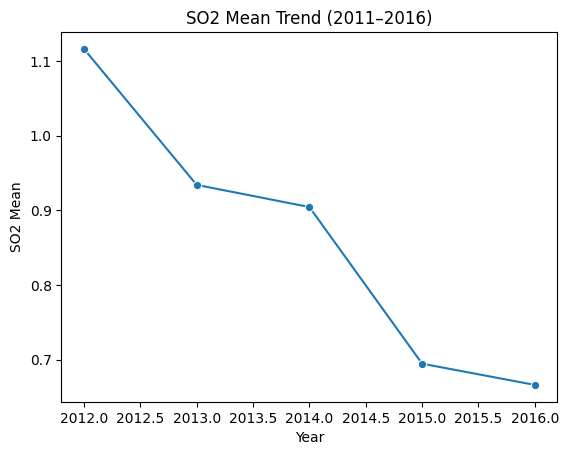

In [13]:
# Cell 13: Yearly average trends
trend_df = df.groupby('Year')[pollutants].mean().reset_index()

# Cell 14: Line plots
for col in pollutants:
    sns.lineplot(data=trend_df, x='Year', y=col, marker='o')
    plt.title(f'{col} Trend (2011–2016)')
    plt.show()


## 🌡️🔗 Correlation Heatmap: Weather vs Pollution

This visualization shows the pairwise correlation between selected weather variables and pollutant concentrations. It helps identify potential relationships that may influence air quality patterns.


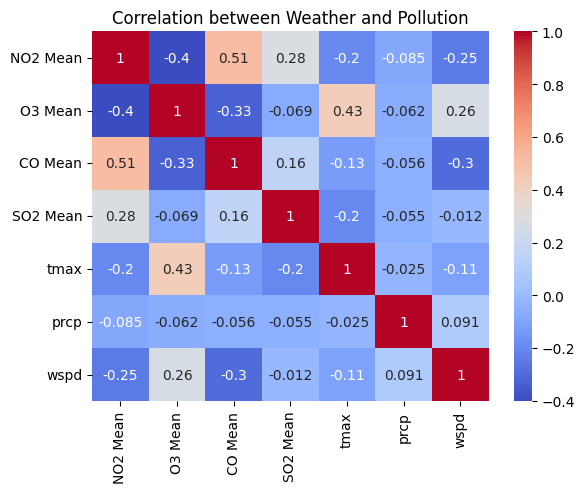

In [14]:
# Cell 15: Correlation heatmap
weather_vars = ['tmax', 'prcp', 'wspd']
corr_df = df[pollutants + weather_vars].corr()

sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation between Weather and Pollution')
plt.show()


In [15]:
import plotly.express as px
import plotly.graph_objects as go


# 🧪 Environmental Data Analysis Pipeline

This workflow performs a comprehensive analysis of air pollution and weather data, including data cleaning, outlier detection, correlation analysis, time series visualization, and hypothesis testing. Each step is designed to support both technical exploration and stakeholder communication.


(53436, 25)
Address                      object
State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
Population                    int32
Latitude                    float64
Longitude                   float64
tmax                        float64
prcp                        float64
wspd                        float64
Year                          int32
dtype: object
            Address    State County    City Date Local   NO2 Mean  \
0  40

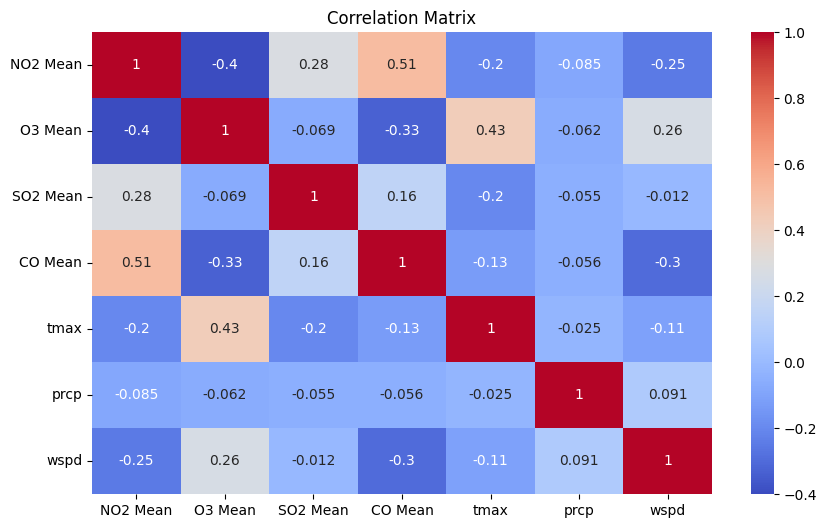

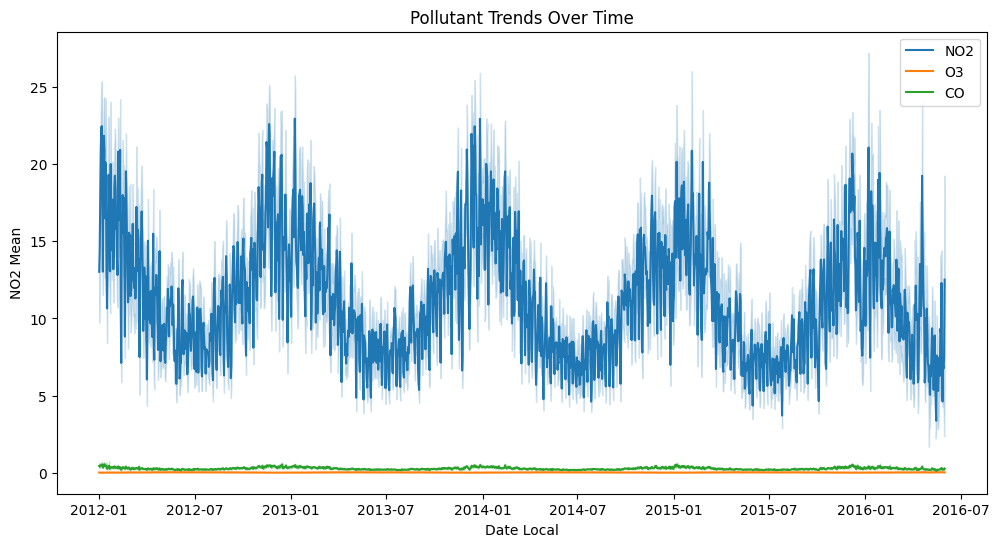

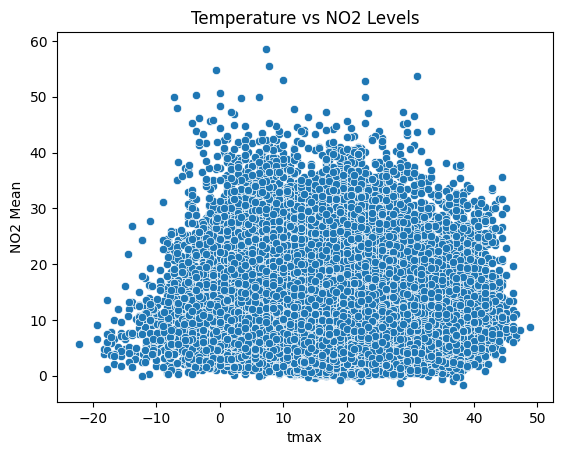

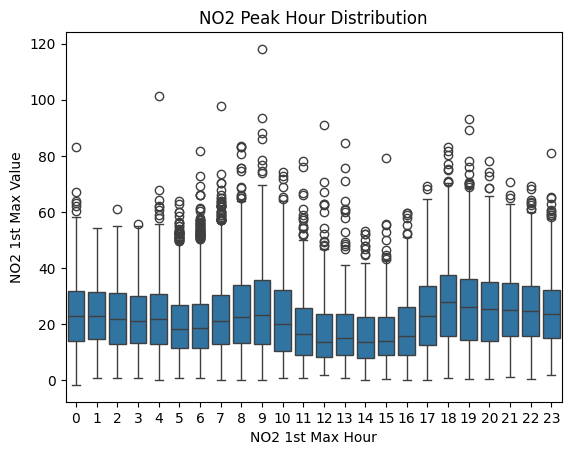

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data Overview
print(df.shape)
print(df.dtypes)
print(df.head())

# 2. Missing Values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# 3. Data Types and Conversion
df['Date Local'] = pd.to_datetime(df['Date Local'])

# 4. Descriptive Statistics
print(df.describe())

# 5. Outlier Detection (IQR method)
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    return outliers

outlier_cols = ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'tmax', 'wspd']
for col in outlier_cols:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers")

# 6. Correlation Analysis
corr = df[['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'tmax', 'prcp', 'wspd']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 7. Time Series Trends
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date Local', y='NO2 Mean', label='NO2')
sns.lineplot(data=df, x='Date Local', y='O3 Mean', label='O3')
sns.lineplot(data=df, x='Date Local', y='CO Mean', label='CO')
plt.title("Pollutant Trends Over Time")
plt.legend()
plt.show()

# 8. Hypothesis Testing (example: temp vs NO2)
sns.scatterplot(data=df, x='tmax', y='NO2 Mean')
plt.title("Temperature vs NO2 Levels")
plt.show()

# Optional: Hourly patterns
sns.boxplot(data=df, x='NO2 1st Max Hour', y='NO2 1st Max Value')
plt.title("NO2 Peak Hour Distribution")
plt.show()


## final steps in EDA

Temporal patterns (trends over time)

Correlation analysis

Pollution vs. weather relationships

AQI distribution

Outlier detection


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53436 entries, 0 to 53435
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Address            53436 non-null  object        
 1   State              53436 non-null  object        
 2   County             53436 non-null  object        
 3   City               53436 non-null  object        
 4   Date Local         53436 non-null  datetime64[ns]
 5   NO2 Mean           53436 non-null  float64       
 6   NO2 1st Max Value  53436 non-null  float64       
 7   NO2 1st Max Hour   53436 non-null  int64         
 8   NO2 AQI            53436 non-null  int64         
 9   O3 Mean            53436 non-null  float64       
 10  O3 1st Max Value   53436 non-null  float64       
 11  O3 1st Max Hour    53436 non-null  int64         
 12  SO2 Mean           53436 non-null  float64       
 13  SO2 1st Max Value  53436 non-null  float6

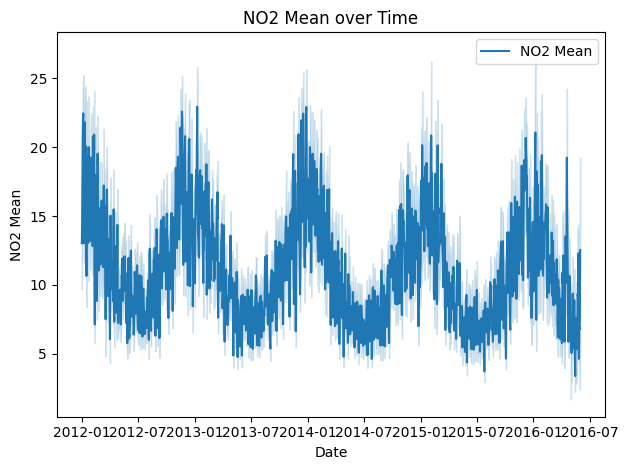

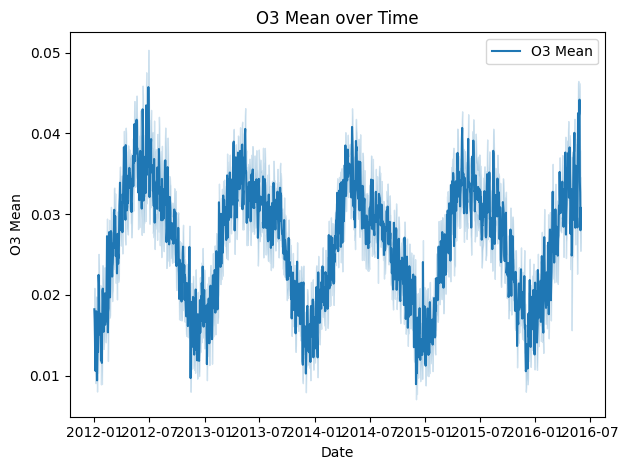

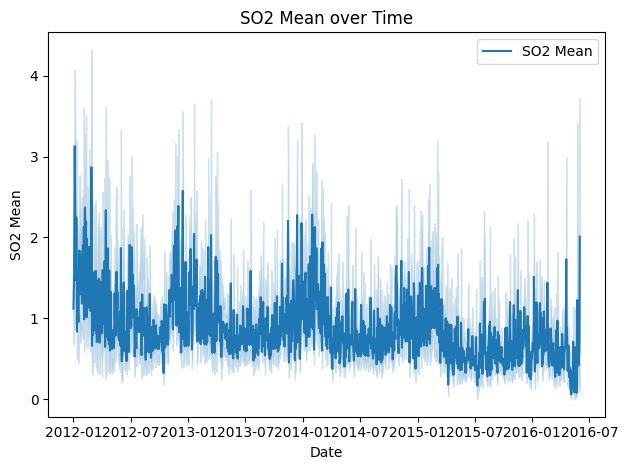

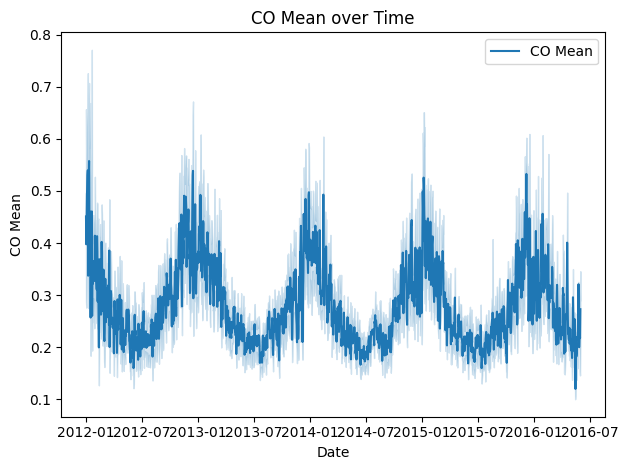

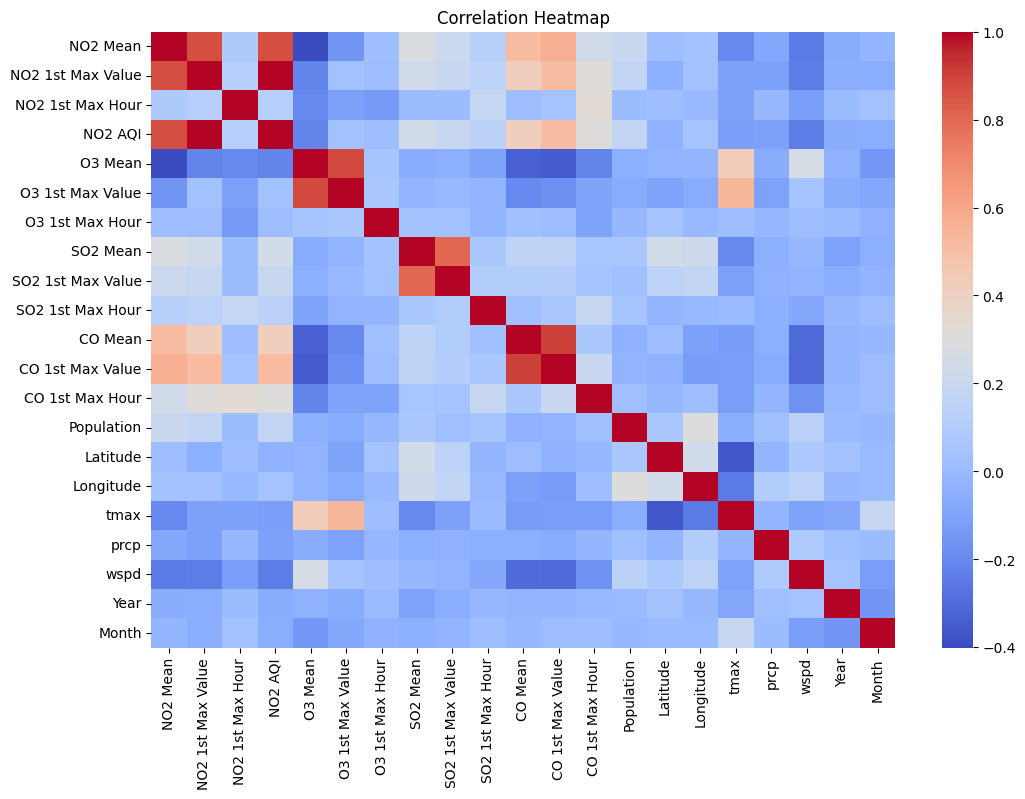


--- Top correlations with NO2 AQI ---
NO2 AQI              1.000000
NO2 1st Max Value    0.999328
NO2 Mean             0.869478
CO 1st Max Value     0.513619
CO Mean              0.418921
CO 1st Max Hour      0.310406
SO2 Mean             0.240858
SO2 1st Max Value    0.195099
Population           0.165835
SO2 1st Max Hour     0.140204
Name: NO2 AQI, dtype: float64


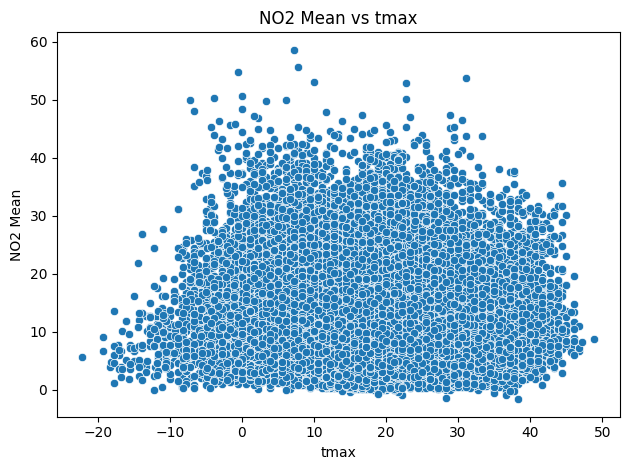

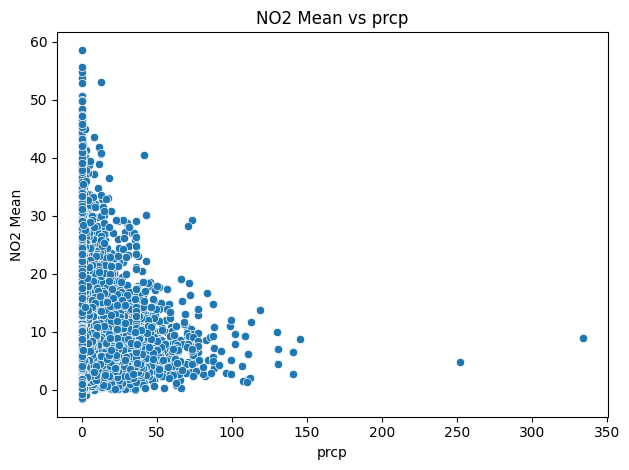

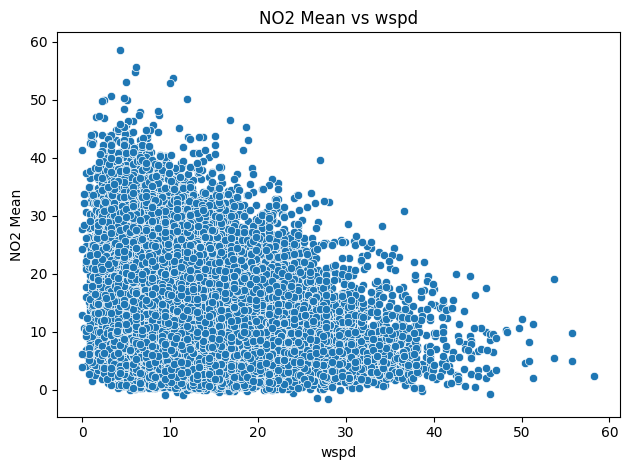

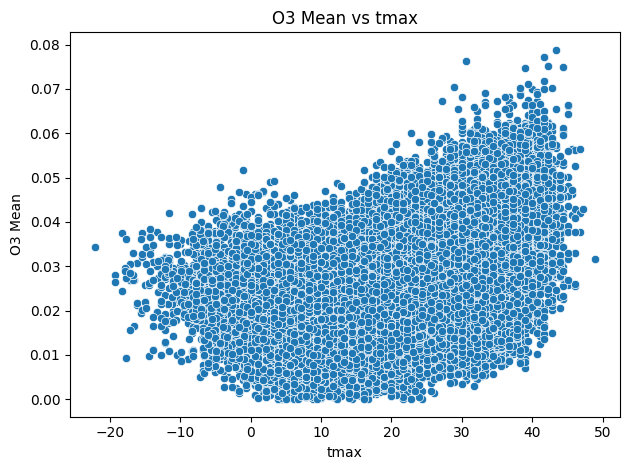

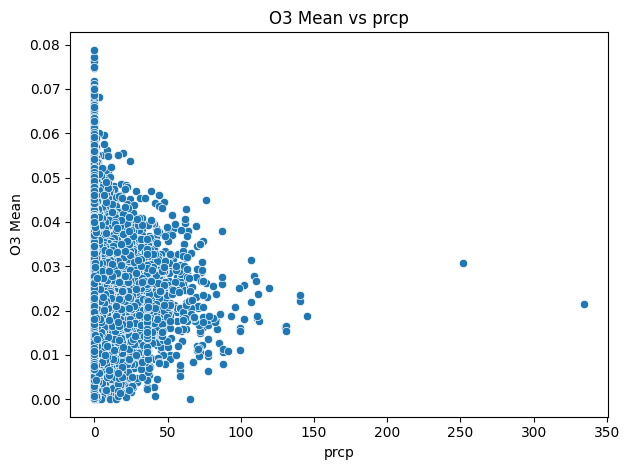

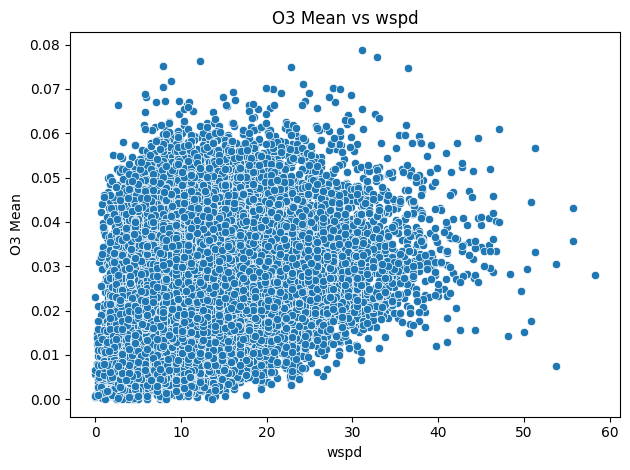

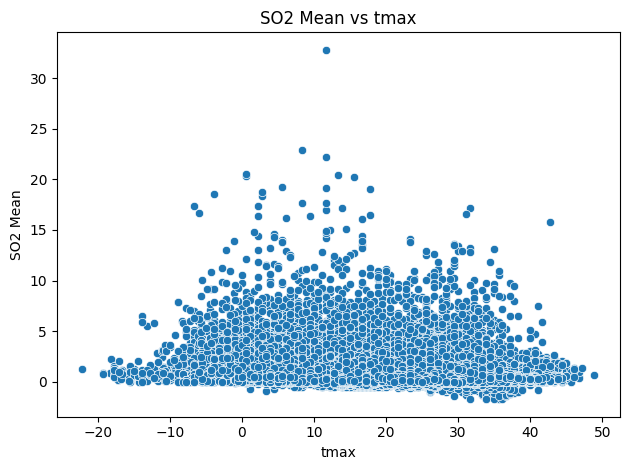

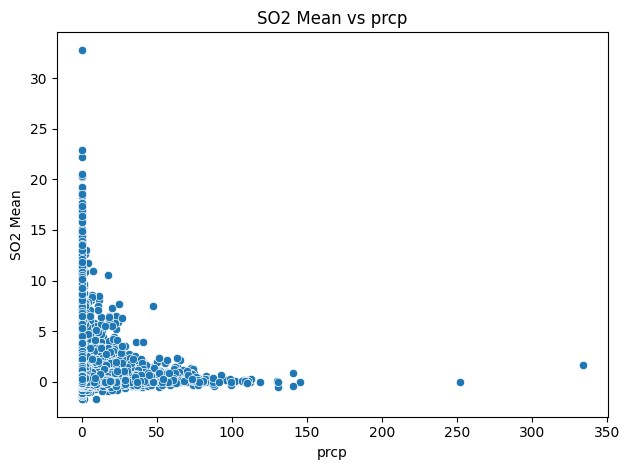

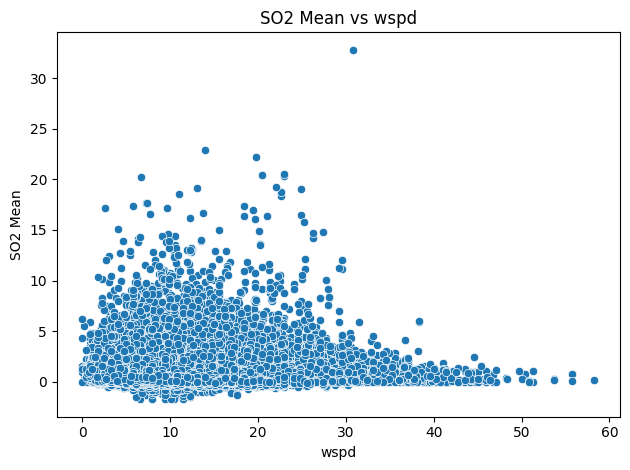

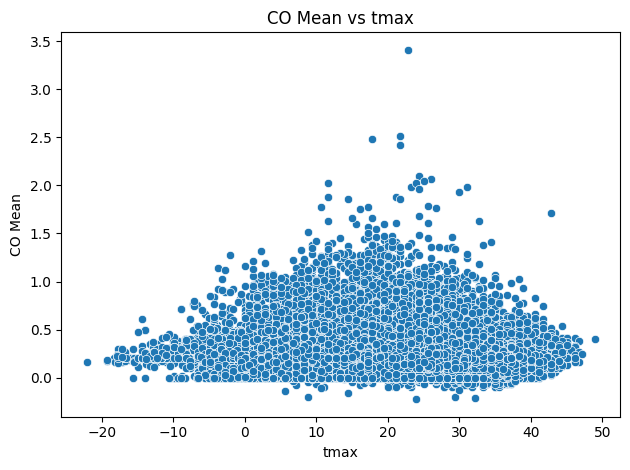

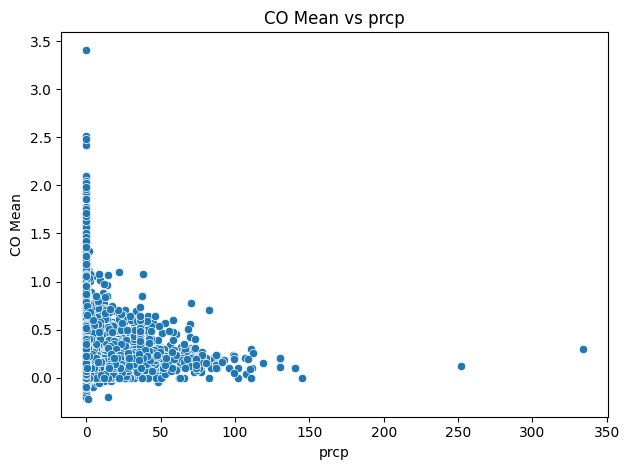

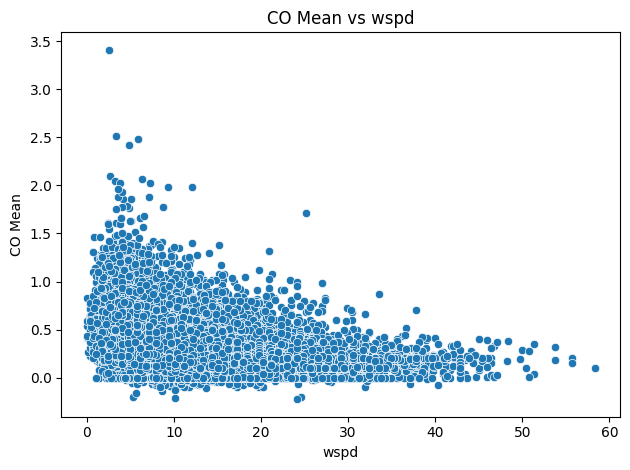

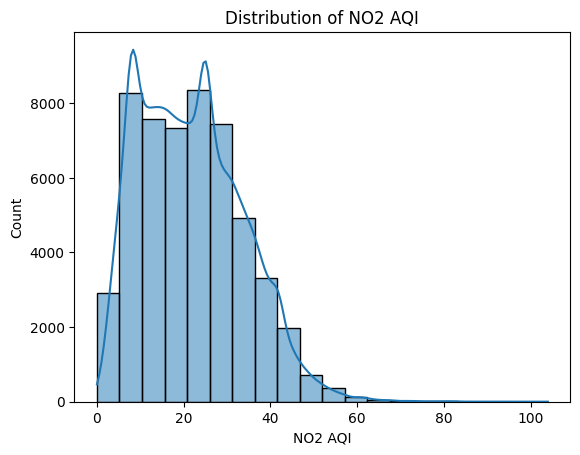

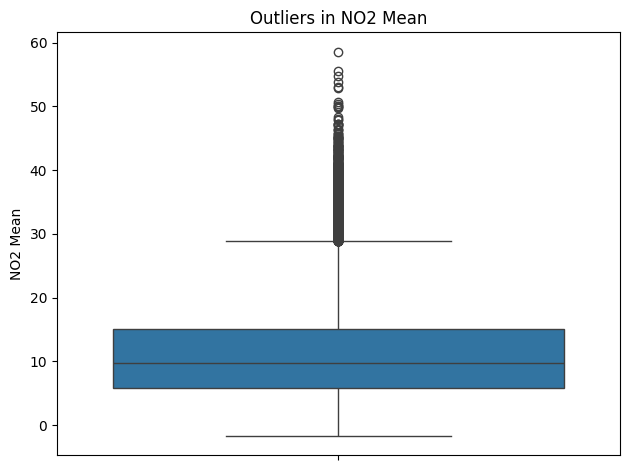

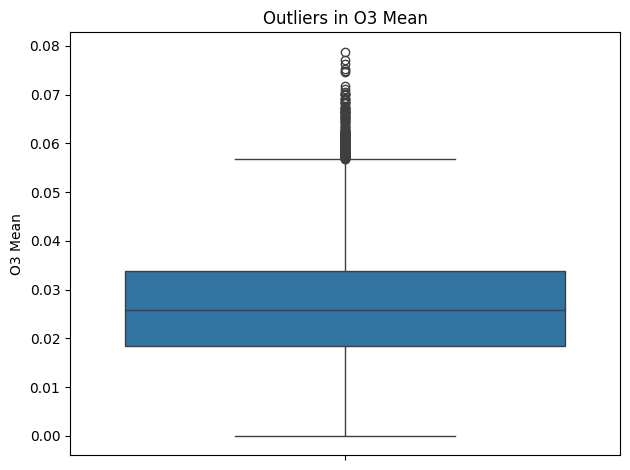

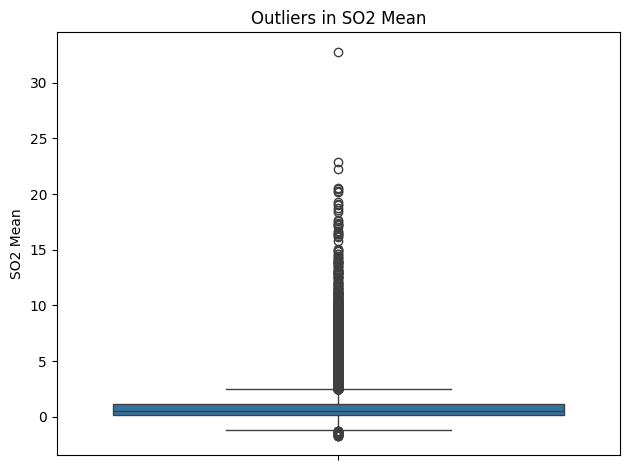

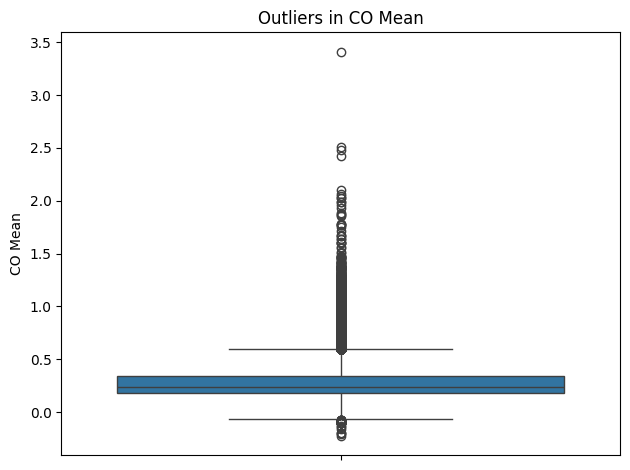

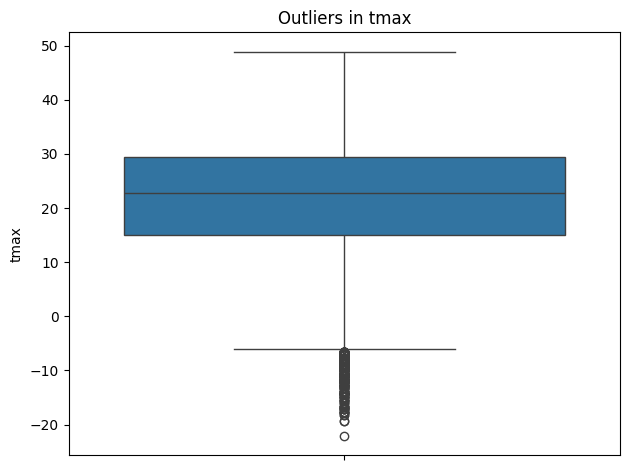

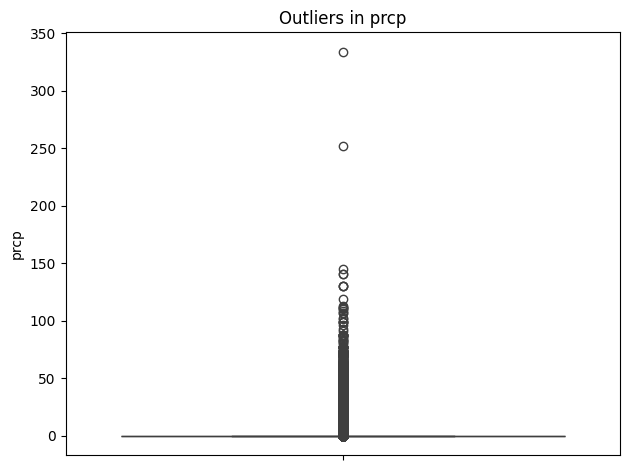

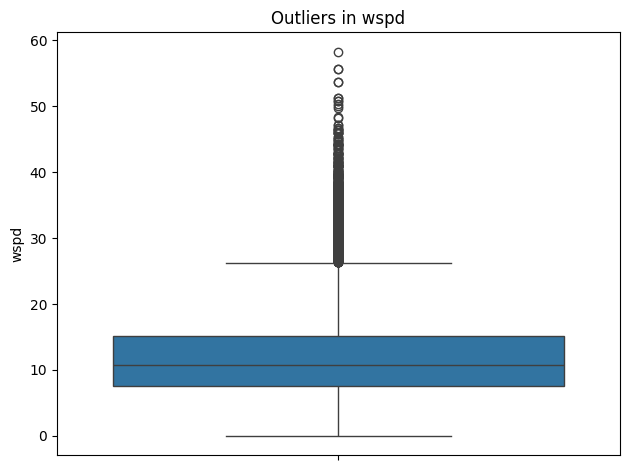

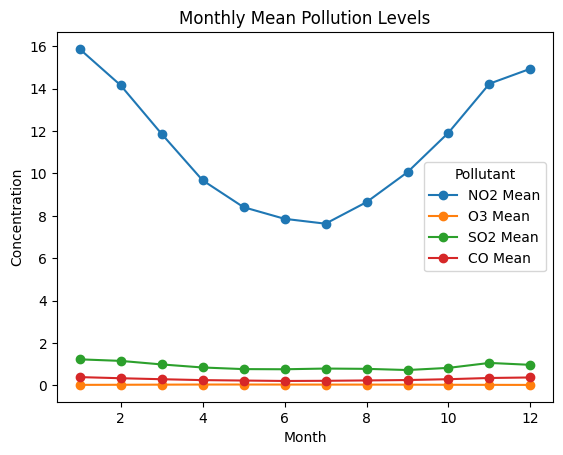

In [18]:
# ===============================
# 3. Basic overview
# ===============================
print("\n--- Basic Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isna().sum())

print("\n--- Descriptive Statistics ---")
print(df.describe().T)

# ===============================
# 4. Time-based trends
# ===============================
pollutants = ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']
for p in pollutants:
    plt.figure()
    sns.lineplot(data=df, x='Date Local', y=p, label=p)
    plt.title(f'{p} over Time')
    plt.xlabel('Date')
    plt.ylabel(p)
    plt.tight_layout()
    plt.show()

# ===============================
# 5. Correlation Analysis
# ===============================
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Find top correlated variables with AQI
if 'NO2 AQI' in df.columns:
    print("\n--- Top correlations with NO2 AQI ---")
    print(corr['NO2 AQI'].sort_values(ascending=False).head(10))

# ===============================
# 6. Pollution vs Weather
# ===============================
weather_vars = ['tmax', 'prcp', 'wspd']

for p in pollutants:
    for w in weather_vars:
        plt.figure()
        sns.scatterplot(data=df, x=w, y=p)
        plt.title(f'{p} vs {w}')
        plt.tight_layout()
        plt.show()

# ===============================
# 7. AQI Distribution
# ===============================
plt.figure()
sns.histplot(df['NO2 AQI'], kde=True, bins=20)
plt.title('Distribution of NO2 AQI')
plt.xlabel('NO2 AQI')
plt.show()

# ===============================
# 8. Outlier Detection (Boxplots)
# ===============================
for p in pollutants + weather_vars:
    plt.figure()
    sns.boxplot(data=df, y=p)
    plt.title(f'Outliers in {p}')
    plt.tight_layout()
    plt.show()

# ===============================
# 9. Optional: Daily/Monthly Aggregation
# ===============================
df['Month'] = df['Date Local'].dt.month
monthly_mean = df.groupby('Month')[pollutants].mean()

monthly_mean.plot(marker='o')
plt.title('Monthly Mean Pollution Levels')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.legend(title='Pollutant')
plt.show()

(On this process you can see that How pollutants vary over time (e.g., spikes, trends)

Which pollutants correlate with temperature or wind speed

How weather affects air quality

Which variables show outliers or anomalies

Correlation patterns — e.g., high NO₂ AQI might correlate with low wind speeds)

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.